In [1]:
from src.main import *
import matplotlib.pyplot as plt
import numpy as np


In [2]:
report_11 = Report(
    'src/data/format-2011-world-copper-2063-trade.json', '2011', 2)
report_12 = Report(
    'src/data/format-2012-world-copper-2063-trade.json', '2012', 2)
report_13 = Report(
    'src/data/format-2013-world-copper-2063-trade.json', '2013', 2)
report_14 = Report(
    'src/data/format-2014-world-copper-2063-trade.json', '2014', 2)
report_15 = Report(
    'src/data/format-2015-world-copper-2063-trade.json', '2015', 2)

report_16 = Report(
    'src/data/format-2016-world-copper-2063-trade.json', '2016', 2)
report_17 = Report(
    'src/data/format-2017-world-copper-2063-trade.json', '2017', 2)
report_18 = Report(
    'src/data/format-2018-world-copper-2063-trade.json', '2018', 2)
report_19 = Report(
    'src/data/format-2019-world-copper-2063-trade.json', '2019', 2)
report_20 = Report(
    'src/data/format-2020-world-copper-2063-trade.json', '2020', 2)


In [11]:
reports = [
    report_11, report_12, report_13, report_14, report_15,
    report_16, report_17, report_18, report_19, report_20
]


def batch_fn(inject, **args):
    for report in reports:
        inject(report, **args)


In [ ]:
"""
for report in reports:
    write_to_excel(report.data_overview(), 'excel/' +
                   report.name + '_copper_2063_trade.xlsx')
"""


In [12]:
pd.DataFrame(report_11.nodes)


,name,code,E,IS,OS,DC,BC,CC
0,China,156,1,3,6,1,1,1
1,Rep. of Korea,410,2,2,6,3,6,2
2,South Africa,710,3,6,5,2,3,3
3,Belgium,56,4,6,6,4,6,3
4,Solomon Isds,90,4,6,6,6,6,6
...,...,...,...,...,...,...,...,...
119,Mozambique,508,6,6,6,6,6,6
120,New Zealand,554,6,6,6,6,6,5
121,Madagascar,450,6,6,6,6,6,5
122,Honduras,340,6,6,6,6,6,4


In [13]:
pd.DataFrame(report_11.net.getAdjacencyEntropies().items())


,0,1
0,8,3.023984e-02
1,156,1.148535e+02
2,792,9.632254e+00
3,12,7.661184e-05
4,826,1.692726e+00
...,...,...
119,52,1.125827e-06
120,400,1.193544e-04
121,780,1.208654e-05
122,862,1.634100e-07


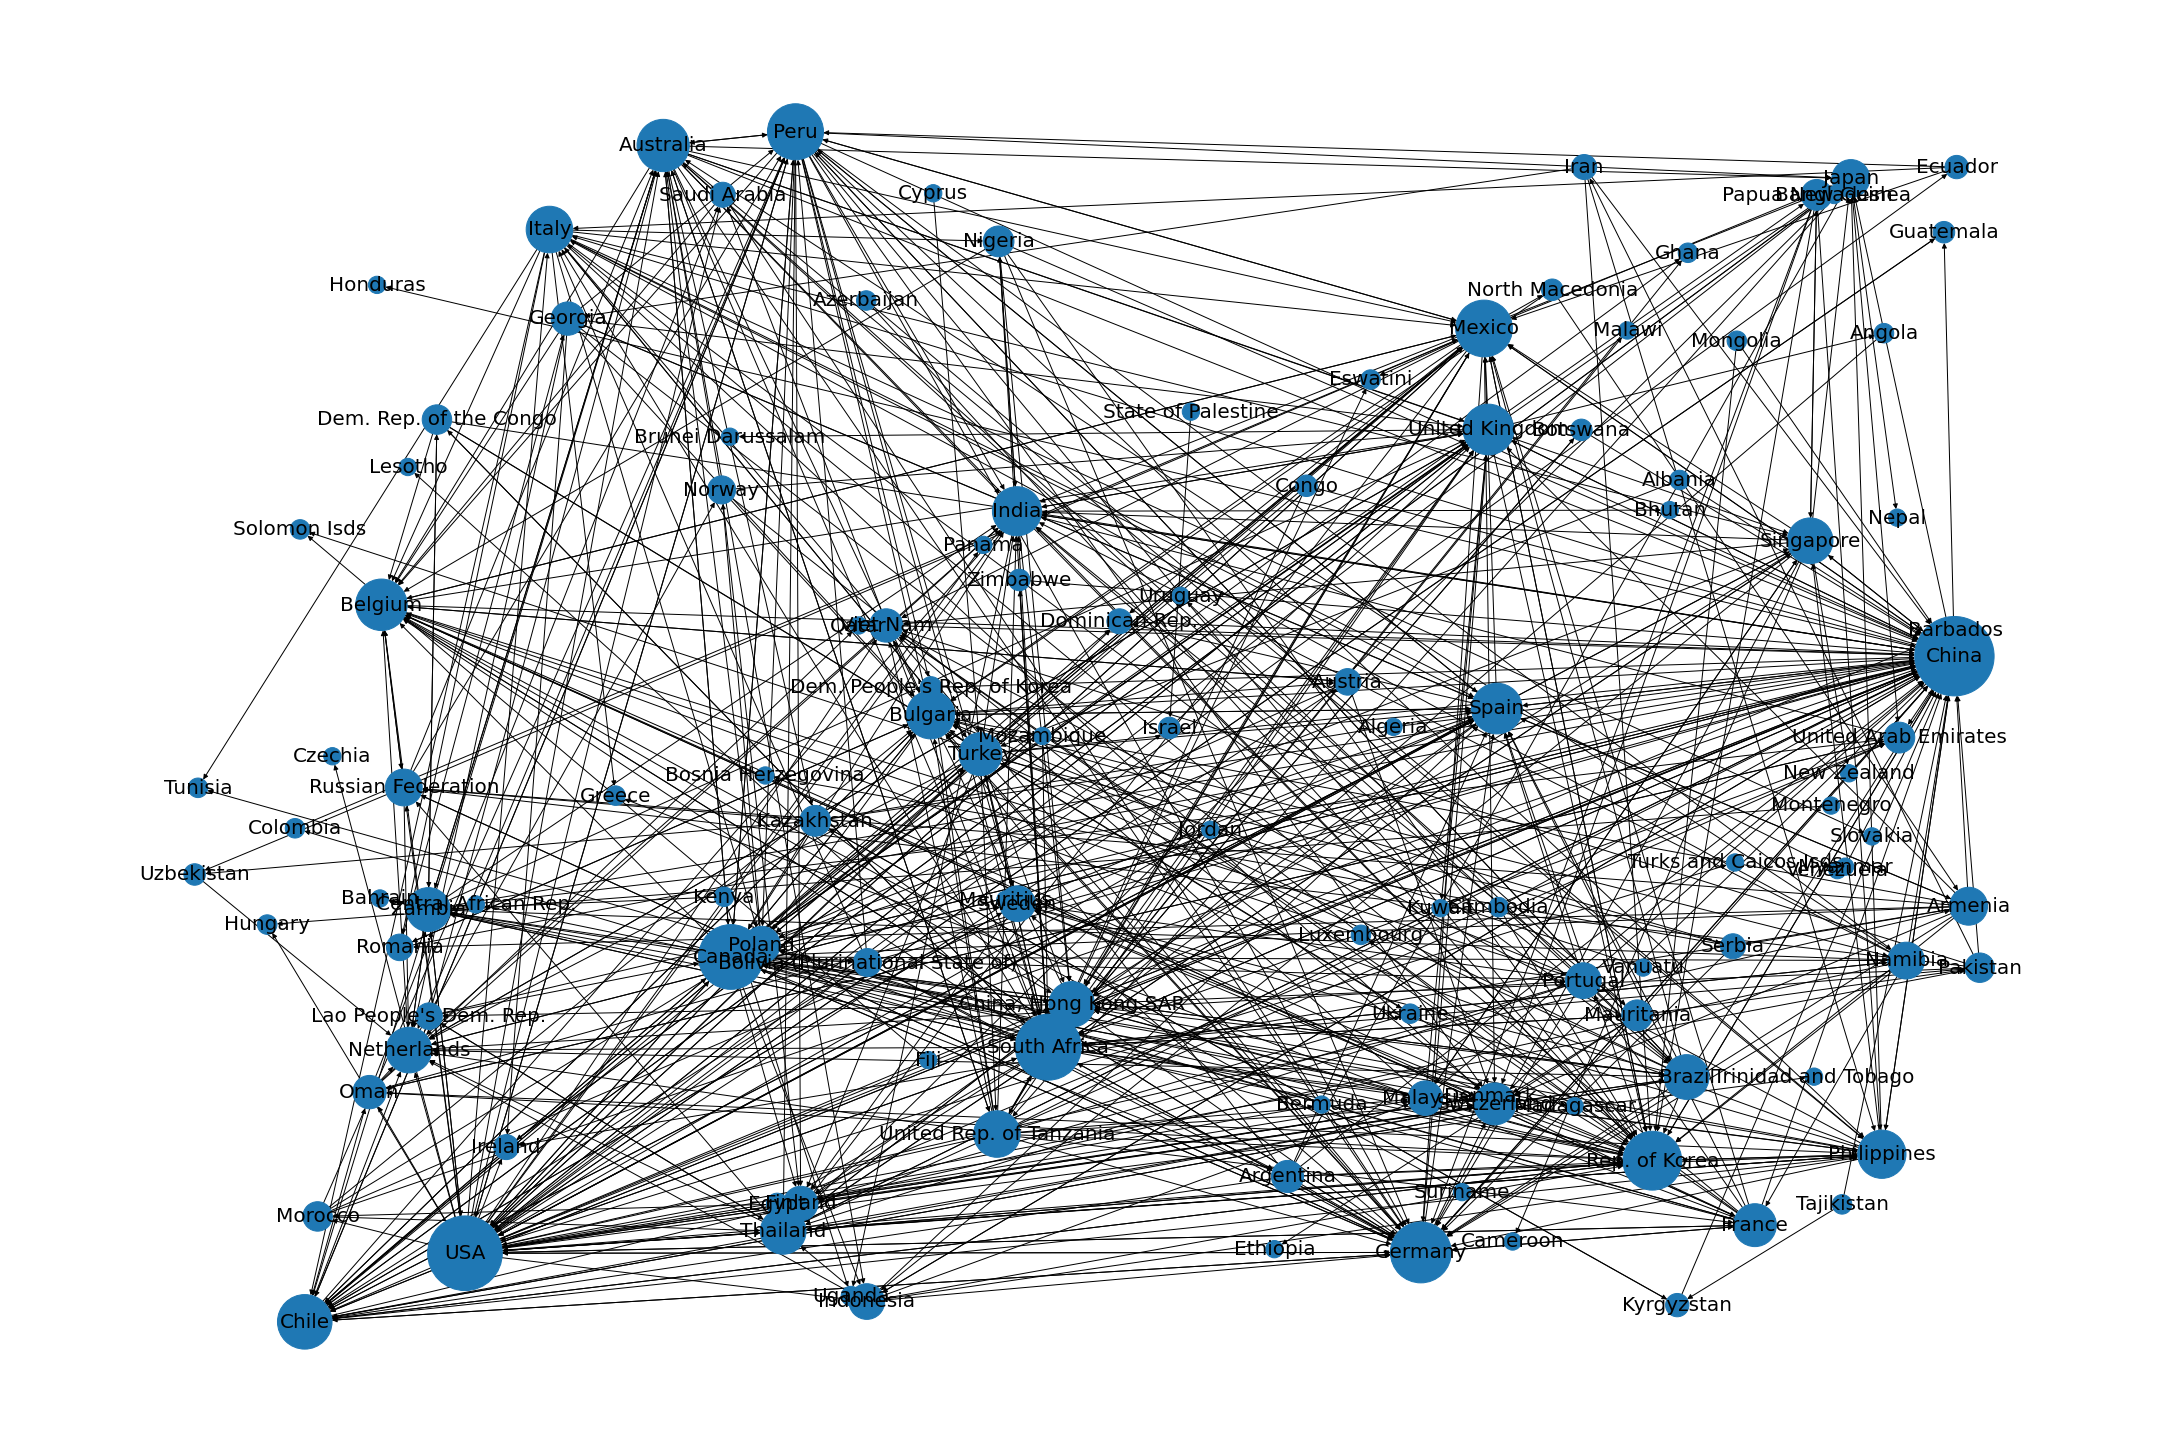

In [14]:
report_11.net.draw()


In [15]:
overview = report_11.data_overview()
# write_to_excel(overview, 'excel/t1_data_overview_16.xlsx')
overview


,Reporter Code,Reporter,Partner Code,Partner,Trade Flow,Trade Value (US$),Trade Quantity,NetWeight
1,8,Albania,156,China,Export,13244524,10912650.0,10912650.0
2,8,Albania,792,Turkey,Export,28169884,20568660.0,20568660.0
3,12,Algeria,156,China,Export,550,105.0,105.0
4,24,Angola,826,United Kingdom,Import,51,1.0,1.0
5,32,Argentina,68,Bolivia (Plurinational State of),Import,288092,5310000.0,5310000.0
...,...,...,...,...,...,...,...,...
841,894,Zambia,757,Switzerland,Export,3228272,3738141.0,3738141.0
842,894,Zambia,784,United Arab Emirates,Export,40,1.0,1.0
843,894,Zambia,826,United Kingdom,Export,1193,862.0,862.0
844,894,Zambia,842,USA,Import,902,7.0,7.0


In [16]:
def removeTest(report):

    fig, axes = plt.subplots()

    indexs = ['BC', 'CC', 'DC', 'E']

    for index in indexs:

        sorted_nodes = sorted(
            report.nodes, key=lambda e: e[index], reverse=True)
        x = [item['code'] for item in sorted_nodes]
        y = report.net.removeTest(x)

        axes.plot(np.arange(len(x)+1), y, label=index)

    axes.legend()
    plt.show()


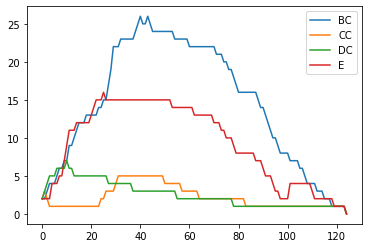

In [17]:
removeTest(report_11)


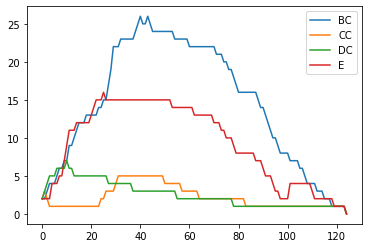

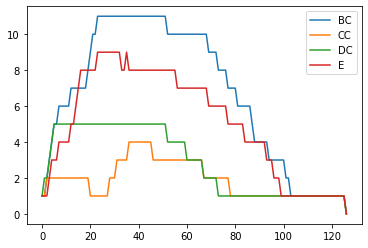

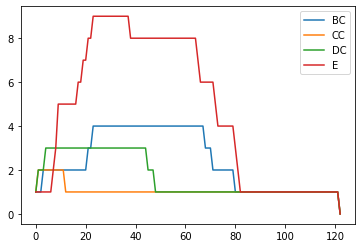

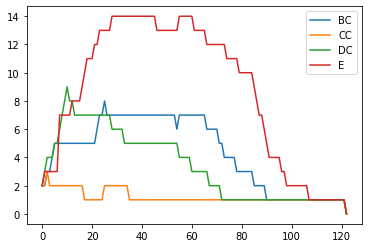

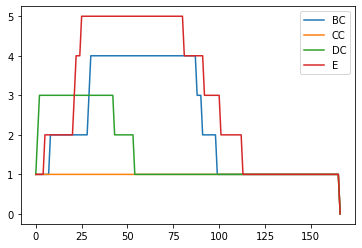

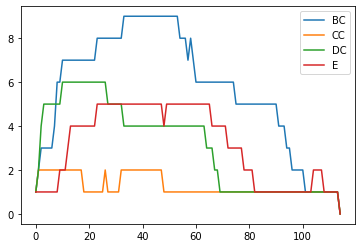

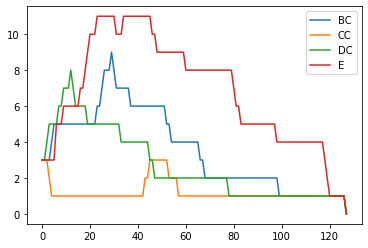

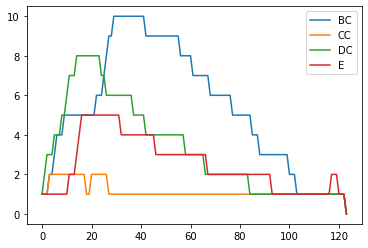

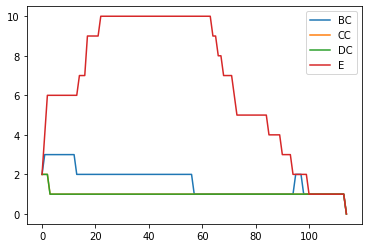

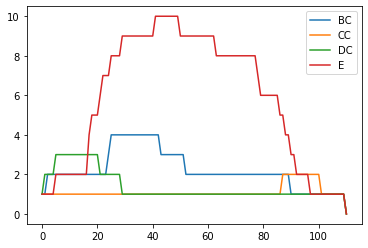

In [18]:
removeTest(report_11)
removeTest(report_12)
removeTest(report_13)
removeTest(report_14)
removeTest(report_15)
removeTest(report_16)
removeTest(report_17)
removeTest(report_18)
removeTest(report_19)
removeTest(report_20)


In [19]:
series = [item['code'] for item in report_11.net.sortedNodes]
y = report_11.net.removeTest(series)


In [21]:
nodes_sort_by_BC = sorted(report_11.nodes, key=lambda e: e['BC'], reverse=True)
series_BC = [item["code"] for item in nodes_sort_by_BC]

nodes_sort_by_DC = sorted(report_11.nodes, key=lambda e: e['DC'], reverse=True)
series_DC = [item["code"] for item in nodes_sort_by_DC]

nodes_sort_by_CC = sorted(report_11.nodes, key=lambda e: e['CC'], reverse=True)
series_CC = [item["code"] for item in nodes_sort_by_CC]


ValueError: x and y must have same first dimension, but have shapes (124,) and (125,)

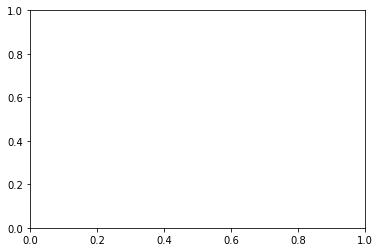

In [22]:

fig, axes = plt.subplots()
axes.plot(np.arange(len(series)), y, label="E")
axes.plot(np.arange(len(series_BC)),
          report_11.net.removeTest(series_BC), label="BC")
axes.plot(np.arange(len(series_CC)),
          report_11.net.removeTest(series_CC), label="CC")
axes.plot(np.arange(len(series_DC)),
          report_11.net.removeTest(series_DC), label="DC")
axes.legend()
plt.show()


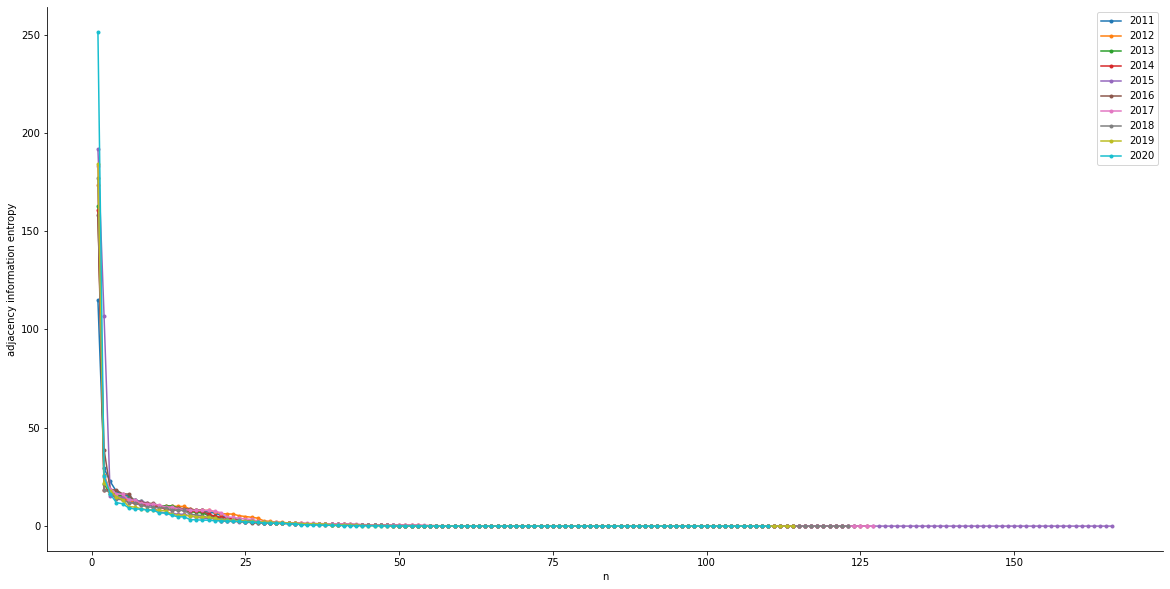

In [23]:
def draw_entropy_plots(slice=None):
    fig, axes = plt.subplots(figsize=(20, 10))
    y_label = "adjacency information entropy"

    def draw_entropy_plot(report, axes):
        nodes = report.net.sortedNodes
        x = np.arange(len(nodes)) + 1
        y = [node['E'] for node in nodes]
        axes.spines['right'].set_visible(False)
        axes.spines['top'].set_visible(False)
        if slice is None:
            axes.plot(x, y, '.-', label=report.name)
        else:
            axes.plot(x[slice[0]: slice[1]], y[slice[0]: slice[1]],
                      '-', label=report.name)

    batch_fn(draw_entropy_plot, axes=axes)

    axes.legend()
    axes.set_xlabel('n')
    axes.set_ylabel(y_label)


draw_entropy_plots()


In [25]:
table_entropy_cluster = show_cluster_list(reports)
table_entropy_cluster
# write_to_excel(table_entropy_cluster, 'excel/entropy_cluster.xlsx')


KeyError: 'label'

In [ ]:
nodes_attribute_20 = report_20.show_nodes_attribute()
# write_to_excel(nodes_attribute_20, 'excel/t2_attributes_2020.xlsx')


In [ ]:
for report in reports:
    report.set_attribute_probability()


In [ ]:
for report in reports:
    # report.show_dt_accuracy()
    # report.save_decision_tree('outputs/decision_tree_' + report.name + '.json')
    for _report in reports:
        res = ID3.checkPrecesion(
            _report.nodes, report.decision_tree) / len(_report.nodes)
        print(report.name + " - " + _report.name + ": " + str(res))


In [ ]:
for report in reports:
    decision_list = pd.DataFrame(report.decision_list)[
        report.attribute_names + ['label', 'p']]\
        .sort_values('p')\
        .reset_index(drop=True)

    print(decision_list[-5:-1])

#write_to_excel(decision_list_20, 'excel/t4_decision_list_2020.xlsx')


In [ ]:
decision_attribute_distribute = get_decision_attribute_distribute(reports)
# write_to_excel(decision_attribute_distribute, 'excel/t5_decision_attribute_distribute.xlsx')
decision_attribute_distribute


In [ ]:
for report in reports:
    report.decision_probability_bar()


In [ ]:
show_hierarchical_risk_bar(reports)
